In [1]:
import codecs                     # load UTF-8 Content
import json                       # load JSON files
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy
import linearmodels as lm# Advanced linear models
from stargazer.stargazer import Stargazer # For beautiful tables
from IPython.core.display import HTML # From render html inside iPython
from collections import OrderedDict # Ordered Dictionary
from linearmodels.iv.results import compare # Compare IVs
from statsmodels.iolib.summary2 import summary_col

In [2]:
import statsmodels.api as sm
import pylab as pl

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Overall

In [27]:
data4 = data4.rename(columns = {"High Earners": "High_Earners","Lower Income Families":"Lower_Income_Families","Middle Income Families":"Middle_Income_Families","Older Lower Income":"Older_Lower_Income","Older Middle Income":"Older_Middle_Income"})

In [28]:
formula='D_OR_Q~PLU_RETAIL_PRICE+DELIVERY_CHARGE+LEAD_TIME+DIFFERENCE_RATE+IF_WEEKEND+WEEE+Installation+Retired+High_Earners+Lower_Income_Families+Middle_Income_Families+Older_Lower_Income+Older_Middle_Income+Millennials'

In [29]:
anova_results = anova_lm(ols(formula,data4).fit())
print(anova_results)

                               df         sum_sq       mean_sq              F  \
PLU_RETAIL_PRICE              1.0     665.859359    665.859359    7520.027106   
DELIVERY_CHARGE               1.0   13576.517092  13576.517092  153329.340801   
LEAD_TIME                     1.0       7.214504      7.214504      81.478565   
DIFFERENCE_RATE               1.0       3.721068      3.721068      42.024688   
IF_WEEKEND                    1.0       1.853755      1.853755      20.935788   
WEEE                          1.0    1903.241441   1903.241441   21494.670062   
Installation                  1.0    5754.286360   5754.286360   64987.281228   
Retired                       1.0       0.024801      0.024801       0.280100   
High_Earners                  1.0      34.924321     34.924321     394.425396   
Lower_Income_Families         1.0      20.796289     20.796289     234.867404   
Middle_Income_Families        1.0      11.188497     11.188497     126.359713   
Older_Lower_Income          

In [3]:
data4 = pd.read_csv('Third_cluster_df.csv')
data4.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            923.00             45.0     1.0          6     0   EN       1   
1           1174.99              0.0     1.0          4     0   BN       0   
2            929.00              0.0     1.0          1     0   SK       0   
3           1044.99             45.0     1.0          5     1   WV       0   
4           1044.99             55.0     1.0          1     1   GU       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             0           0        2020  ...                      0   
2             0           0        2019  ...                      0   
3             1           0        2020  ...                      0   
4             0           0        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            1                0               0                        0   
2            1                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.096660  
1                 0         0.061808  
2                 0         0.074269  
3                 0         0.048007  
4                 0         0.045579  

[5 rows x 34 columns]

In [4]:
data4["lg_retail_price"] = np.log(data4["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data4[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [5]:
data4['INTERCEPT']=1

In [6]:
data4["time_weee"] = data4["LEAD_TIME"].mul(data4["WEEE"])
data4["time_installation"] = data4["LEAD_TIME"].mul(data4["Installation"])

In [7]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE','INTERCEPT', 'High Earners',
       'Middle Income Families', 'Millennials', 'Older Lower Income',
       'Older Middle Income', 'Retired', '1 DOOR FRIDGES & FREEZERS',
       'BUILT-IN COOKING', 'COOKING FREE STANDING', 'DISHWASHERS',
       'FRIDGE FREEZERS', 'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES','time_weee','time_installation']
X = data4[independent_variables]

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor                        features
0          1.8                 lg_retail_price
1          1.6                       LEAD_TIME
2          2.8                 DELIVERY_CHARGE
3          3.9                            WEEE
4          4.2                    Installation
5          1.0                      IF_WEEKEND
6          1.0                 DIFFERENCE_RATE
7        275.2                       INTERCEPT
8          1.6                    High Earners
9          1.4          Middle Income Families
10         1.4                     Millennials
11         1.6              Older Lower Income
12         1.4             Older Middle Income
13         1.8                         Retired
14         4.5       1 DOOR FRIDGES & FREEZERS
15         3.4                BUILT-IN COOKING
16         3.1           COOKING FREE STANDING
17         2.5                     DISHWASHERS
18         4.9                 FRIDGE FREEZERS
19         2.8                  INTEGRATED MDA
20         4.5         LARGE SCREEN TELEVISION
21         1.3  SLIM AMERICAN STYLE FRIDGE FRZ
22         3.4                   TUMBLE DRYERS
23         1.7                   WASHER DRYERS
24         6.8                WASHING MACHINES
25         3.8                       time_weee
26         4.0               time_installation

In [8]:
logit = sm.Logit(data4['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.305880
         Iterations 7


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:              3769092
Model:                          Logit   Df Residuals:                  3769065
Method:                           MLE   Df Model:                           26
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.09246
Time:                        02:50:50   Log-Likelihood:            -1.1529e+06
converged:                       True   LL-Null:                   -1.2704e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lg_retail_price                    0.2959      0.004     72.449      0.000       0.288       0.304
LEAD_TIME                          0.0352      0.000     73.571      0.000       0.034       0.036
DELIVERY_CHARGE                    0.0440      0.000    429.836      0.000       0.044       0.044
WEEE                              -0.6869      0.007   -100.132      0.000      -0.700      -0.673
Installation                      -0.9535      0.008   -118.485      0.000      -0.969      -0.938
IF_WEEKEND                        -0.0105      0.004     -2.984      0.003      -0.017      -0.004
DIFFERENCE_RATE                   -0.2080      0.024     -8.804      0.000      -0.254      -0.162
INTERCEPT                         -4.8675      0.029   -169.447      0.000      -4.924      -4.811
High Earners                       0.1543      0.006     24.367      0.000       0.142       0.167
Middle Income Families             0.0337      0.007      4.697      0.000       0.020       0.048
Millennials                        0.1079      0.007     15.657      0.000       0.094       0.121
Older Lower Income                 0.1452      0.006     23.918      0.000       0.133       0.157
Older Middle Income                0.1404      0.007     20.092      0.000       0.127       0.154
Retired                            0.0863      0.006     14.839      0.000       0.075       0.098
1 DOOR FRIDGES & FREEZERS          0.6665      0.012     57.664      0.000       0.644       0.689
BUILT-IN COOKING                  -0.3404      0.012    -27.902      0.000      -0.364      -0.317
COOKING FREE STANDING             -0.6643      0.012    -54.899      0.000      -0.688      -0.641
DISHWASHERS                        0.3482      0.013     26.705      0.000       0.323       0.374
FRIDGE FREEZERS                    0.2421      0.011     23.014      0.000       0.222       0.263
INTEGRATED MDA                    -0.5167      0.012    -41.479      0.000      -0.541      -0.492
LARGE SCREEN TELEVISION            0.0854      0.010      8.510      0.000       0.066       0.105
SLIM AMERICAN STYLE FRIDGE FRZ     0.1342      0.017      7.790      0.000       0.100       0.168
TUMBLE DRYERS                      0.8093      0.011     72.854      0.000       0.787       0.831
WASHER DRYERS                      0.5729      0.014     41.814      0.000       0.546       0.600
WASHING MACHINES                   0.3014      0.010     29.141      0.000       0.281       0.322
time_weee                         -0.0068      0.001     -7.839      0.000      -0.008      -0.005
time_installation                 -0.0501      0.001    -52.271      0.000      -0.052      -0.048
==================================================================================================
"""

In [10]:
print(np.exp(result.params))

lg_retail_price                   1.344344
LEAD_TIME                         1.035826
DELIVERY_CHARGE                   1.044997
WEEE                              0.503126
Installation                      0.385400
IF_WEEKEND                        0.989526
DIFFERENCE_RATE                   0.812211
INTERCEPT                         0.007693
High Earners                      1.166798
Middle Income Families            1.034290
Millennials                       1.113961
Older Lower Income                1.156280
Older Middle Income               1.150746
Retired                           1.090141
1 DOOR FRIDGES & FREEZERS         1.947464
BUILT-IN COOKING                  0.711473
COOKING FREE STANDING             0.514657
DISHWASHERS                       1.416449
FRIDGE FREEZERS                   1.273964
INTEGRATED MDA                    0.596485
LARGE SCREEN TELEVISION           1.089154
SLIM AMERICAN STYLE FRIDGE FRZ    1.143645
TUMBLE DRYERS                     2.246254
WASHER DRYE

In [11]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                                    2.5%     97.5%        OR
lg_retail_price                 1.333625  1.355148  1.344344
LEAD_TIME                       1.034856  1.036798  1.035826
DELIVERY_CHARGE                 1.044787  1.045207  1.044997
WEEE                            0.496407  0.509936  0.503126
Installation                    0.379369  0.391527  0.385400
IF_WEEKEND                      0.982706  0.996393  0.989526
DIFFERENCE_RATE                 0.775458  0.850706  0.812211
INTERCEPT                       0.007271  0.008138  0.007693
High Earners                    1.152410  1.181366  1.166798
Middle Income Families          1.019842  1.048943  1.034290
Millennials                     1.099012  1.129112  1.113961
Older Lower Income              1.142603  1.170121  1.156280
Older Middle Income             1.135092  1.166617  1.150746
Retired                         1.077785  1.102639  1.090141
1 DOOR FRIDGES & FREEZERS       1.903841  1.992087  1.947464
BUILT-IN COOKING        

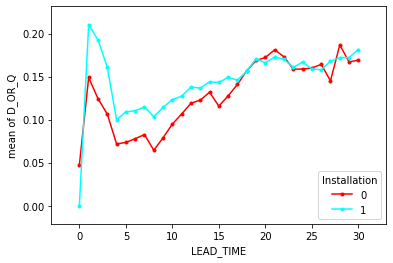

In [45]:
import statsmodels
fig = statsmodels.graphics.factorplots.interaction_plot(data4['LEAD_TIME'],data4['Installation'],data4['D_OR_Q'])
import matplotlib.pyplot as plt
plt.show()

### Washing Machine

In [3]:
data1 = pd.read_csv('washing_machine.csv')
data1.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1279.00              0.0     1.0          7     1   TR       0   
1           1199.00             10.0     1.0          3     0   NG       0   
2           1149.99             55.0     1.0          3     1   TA       0   
3           1068.00             20.0     1.0          7     1   UB       0   
4           1299.00              5.0     1.0          2     0   CM       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             0           0        2019  ...                      0   
2             1           1        2020  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 1         0.293692  
1                 1         0.055774  
2                 1         0.181929  
3                 1         0.061258  
4                 1         0.064067  

[5 rows x 34 columns]

In [4]:
data1.describe()

PLU_RETAIL_PRICE  DELIVERY_CHARGE    VOLUME      LEAD_TIME  \
count     834507.000000    834507.000000  834507.0  834507.000000   
mean         304.785369        24.438528       1.0       4.992167   
std          119.928494        22.266810       0.0       3.570614   
min           72.990000         0.000000       1.0       0.000000   
25%          219.000000         0.000000       1.0       3.000000   
50%          269.000000        20.000000       1.0       4.000000   
75%          379.000000        45.000000       1.0       6.000000   
max         1699.990000       120.000000       1.0      30.000000   

                WEEE         D_OR_Q   Installation     IF_WEEKEND  \
count  834507.000000  834507.000000  834507.000000  834507.000000   
mean        0.440295       0.094561       0.421464       0.448344   
std         0.496423       0.292608       0.493794       0.497325   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ORDER_YEAR    ORDER_MONTH  ...  COOKING FREE STANDING  DISHWASHERS  \
count  834507.000000  834507.000000  ...               834507.0     834507.0   
mean     2019.214529       5.652779  ...                    0.0          0.0   
std         0.410495       3.603465  ...                    0.0          0.0   
min      2019.000000       1.000000  ...                    0.0          0.0   
25%      2019.000000       2.000000  ...                    0.0          0.0   
50%      2019.000000       5.000000  ...                    0.0          0.0   
75%      2019.000000       9.000000  ...                    0.0          0.0   
max      2020.000000      12.000000  ...                    0.0          0.0   

       FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
count         834507.0        834507.0                 834507.0   
mean               0.0             0.0                      0.0   
std                0.0             0.0                      0.0   
min                0.0             0.0                      0.0   
25%                0.0             0.0                      0.0   
50%                0.0             0.0                      0.0   
75%                0.0             0.0                      0.0   
max                0.0             0.0                      0.0   

       SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
count                        834507.0       834507.0       834507.0   
mean                              0.0            0.0            0.0   
std                               0.0            0.0            0.0   
min                               0.0            0.0            0.0   
25%                               0.0            0.0            0.0   
50%                               0.0            0.0            0.0   
75%                               0.0            0.0            0.0   
max                               0.0            0.0            0.0   

       WASHING MACHINES  DIFFERENCE_RATE  
count          834507.0    834507.000000  
mean                1.0         0.107343  
std                 0.0         0.075390  
min                 1.0         0.023819  
25%                 1.0         0.051971  
50%                 1.0         0.077205  
75%                 1.0         0.142847  
max                 1.0         0.942810  

[8 rows x 33 columns]

In [5]:
del data1['ORDER_YEAR'],data1['ORDER_MONTH'],data1['ORDER_DAY'],data1['DELIVERY_DAY'],data1['DELIVERY_MONTH'],data1['DELIVERY_YEAR']

In [6]:
data1.columns

Index(['PLU_RETAIL_PRICE', 'DELIVERY_CHARGE', 'VOLUME', 'LEAD_TIME', 'WEEE',
       'AREA', 'D_OR_Q', 'Installation', 'IF_WEEKEND', 'High Earners',
       'Lower Income Families', 'Middle Income Families', 'Millennials',
       'Older Lower Income', 'Older Middle Income', 'Retired',
       '1 DOOR FRIDGES & FREEZERS', 'BUILT-IN COOKING',
       'COOKING FREE STANDING', 'DISHWASHERS', 'FRIDGE FREEZERS',
       'INTEGRATED MDA', 'LARGE SCREEN TELEVISION',
       'SLIM AMERICAN STYLE FRIDGE FRZ', 'TUMBLE DRYERS', 'WASHER DRYERS',
       'WASHING MACHINES', 'DIFFERENCE_RATE'],
      dtype='object')

In [7]:
data1['INTERCEPT']=1

In [8]:
data1["time_weee"] = data1["LEAD_TIME"].mul(data1["WEEE"])
data1["time_installation"] = data1["LEAD_TIME"].mul(data1["Installation"])

In [9]:
data1["lg_retail_price"] = np.log(data1["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data1[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [6]:
data1["lg_delivery_charge"] = np.log(data1["DELIVERY_CHARGE"]+1) # Transfrom to Log
axes = data1[["DELIVERY_CHARGE","lg_delivery_charge"]].hist() # draw Histogram

In [10]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE','INTERCEPT']
X = data1[independent_variables]

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         3.3  DELIVERY_CHARGE
2         1.1        LEAD_TIME
3         1.8             WEEE
4         2.1     Installation
5         1.0       IF_WEEKEND
6         1.0  DIFFERENCE_RATE
7       279.7        INTERCEPT

In [12]:
logit = sm.Logit(data1['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.258400
         Iterations 7


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               834507
Model:                          Logit   Df Residuals:                   834499
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1743
Time:                        01:26:14   Log-Likelihood:            -2.1564e+05
converged:                       True   LL-Null:                   -2.6117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.3740      0.012     32.238      0.000       0.351       0.397
DELIVERY_CHARGE     0.0798      0.000    269.109      0.000       0.079       0.080
LEAD_TIME           0.0982      0.001     99.966      0.000       0.096       0.100
WEEE               -1.3610      0.010   -132.692      0.000      -1.381      -1.341
Installation       -1.4946      0.012   -129.277      0.000      -1.517      -1.472
IF_WEEKEND         -0.0920      0.008    -11.191      0.000      -0.108      -0.076
DIFFERENCE_RATE    -0.2179      0.055     -3.986      0.000      -0.325      -0.111
INTERCEPT          -5.9466      0.067    -88.831      0.000      -6.078      -5.815
===================================================================================
"""

In [14]:
print(np.exp(result.params))

lg_retail_price    1.453547
DELIVERY_CHARGE    1.083019
LEAD_TIME          1.103179
WEEE               0.256416
Installation       0.224339
IF_WEEKEND         0.912101
DIFFERENCE_RATE    0.804188
INTERCEPT          0.002615
dtype: float64


In [15]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.420868  1.486978  1.453547
DELIVERY_CHARGE  1.082390  1.083649  1.083019
LEAD_TIME        1.101058  1.105305  1.103179
WEEE             0.251313  0.261622  0.256416
Installation     0.219312  0.229480  0.224339
IF_WEEKEND       0.897522  0.926917  0.912101
DIFFERENCE_RATE  0.722464  0.895157  0.804188
INTERCEPT        0.002293  0.002981  0.002615


### Large Screen Television

In [16]:
data2 = pd.read_csv('large_screen_TV.csv')
data2.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            1899.0              0.0     1.0          4     0   TD       0   
1            1299.0              0.0     1.0          5     0   NG       0   
2            2399.0              0.0     1.0          5     0   SK       0   
3            9999.0              0.0     1.0          5     0   CH       0   
4            3999.0             30.0     1.0          1     0    L       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2019  ...                      0   
1             0           1        2019  ...                      0   
2             0           1        2019  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        1   
1            0                0               0                        1   
2            0                0               0                        1   
3            0                0               0                        1   
4            0                0               0                        1   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.332734  
1                 0         0.055774  
2                 0         0.074269  
3                 0         0.105094  
4                 0         0.062209  

[5 rows x 34 columns]

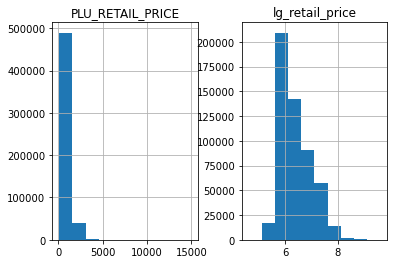

In [17]:
data2["lg_retail_price"] = np.log(data2["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data2[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

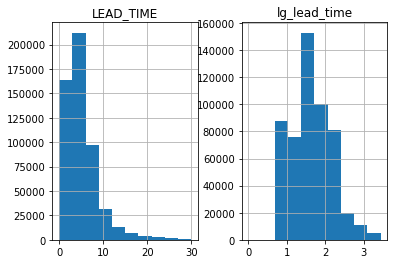

In [17]:
data2["lg_lead_time"] = np.log(data2["LEAD_TIME"]+1) # Transfrom to Log
axes = data2[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [18]:
data2['INTERCEPT']=1

In [19]:
data2["time_weee"] = data2["LEAD_TIME"].mul(data2["WEEE"])
data2["time_installation"] = data2["LEAD_TIME"].mul(data2["Installation"])

In [20]:
independent_variables = ['lg_retail_price','DELIVERY_CHARGE','LEAD_TIME','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data2[independent_variables]

In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         2.4  DELIVERY_CHARGE
2         1.0        LEAD_TIME
3         1.1             WEEE
4         2.3     Installation
5         1.0  DIFFERENCE_RATE
6       121.0        INTERCEPT

In [22]:
logit = sm.Logit(data2['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.282476
         Iterations 7


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               533574
Model:                          Logit   Df Residuals:                   533567
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1179
Time:                        01:27:08   Log-Likelihood:            -1.5072e+05
converged:                       True   LL-Null:                   -1.7086e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.4208      0.008     53.960      0.000       0.406       0.436
DELIVERY_CHARGE     0.0529      0.000    168.428      0.000       0.052       0.053
LEAD_TIME           0.0309      0.001     25.887      0.000       0.029       0.033
WEEE               -0.3269      0.022    -15.086      0.000      -0.369      -0.284
Installation       -1.5509      0.018    -83.919      0.000      -1.587      -1.515
DIFFERENCE_RATE    -0.2207      0.066     -3.352      0.001      -0.350      -0.092
INTERCEPT          -5.6061      0.051   -108.889      0.000      -5.707      -5.505
===================================================================================
"""

In [24]:
print(np.exp(result.params))

lg_retail_price    1.523215
DELIVERY_CHARGE    1.054273
LEAD_TIME          1.031355
WEEE               0.721121
Installation       0.212064
DIFFERENCE_RATE    0.801937
INTERCEPT          0.003675
dtype: float64


In [25]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.500109  1.546676  1.523215
DELIVERY_CHARGE  1.053624  1.054921  1.054273
LEAD_TIME        1.028947  1.033769  1.031355
WEEE             0.691131  0.752412  0.721121
Installation     0.204520  0.219886  0.212064
DIFFERENCE_RATE  0.704830  0.912423  0.801937
INTERCEPT        0.003322  0.004065  0.003675


### Fridge Freezers

In [26]:
data3 = pd.read_csv('fridge_freezer.csv')
data3.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0        1593.98999             40.0     1.0          7     1   PO       0   
1        1799.00000              0.0     1.0          4     0   HU       0   
2        1599.00000             40.0     1.0          5     0   SE       0   
3        1699.00000             20.0     1.0          6     1   DE       1   
4        1482.00000             50.0     1.0          3     1   RH       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           1        2019  ...                      0   
2             0           1        2019  ...                      0   
3             0           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                1               0                        0   
1            0                1               0                        0   
2            0                1               0                        0   
3            0                1               0                        0   
4            0                1               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.047662  
1                 0         0.251126  
2                 0         0.036795  
3                 0         0.044488  
4                 0         0.084498  

[5 rows x 34 columns]

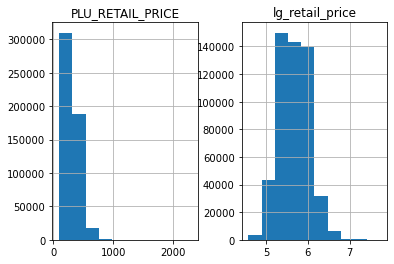

In [27]:
data3["lg_retail_price"] = np.log(data3["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data3[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

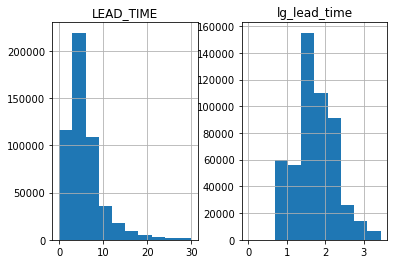

In [28]:
data3["lg_lead_time"] = np.log(data3["LEAD_TIME"]+1) # Transfrom to Log
axes = data3[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [29]:
data3['INTERCEPT']=1

In [30]:
data3["time_weee"] = data3["LEAD_TIME"].mul(data3["WEEE"])
data3["time_installation"] = data3["LEAD_TIME"].mul(data3["Installation"])

In [33]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','IF_WEEKEND','DIFFERENCE_RATE','INTERCEPT']
X = data3[independent_variables]

In [34]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.1        LEAD_TIME
2         1.7  DELIVERY_CHARGE
3         1.6             WEEE
4         1.0     Installation
5         1.0       IF_WEEKEND
6         1.0  DIFFERENCE_RATE
7       286.6        INTERCEPT

In [35]:
logit = sm.Logit(data3['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.294950
         Iterations 7


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               518566
Model:                          Logit   Df Residuals:                   518558
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1415
Time:                        01:27:41   Log-Likelihood:            -1.5295e+05
converged:                       True   LL-Null:                   -1.7816e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1681      0.014     11.862      0.000       0.140       0.196
LEAD_TIME           0.0724      0.001     70.387      0.000       0.070       0.074
DELIVERY_CHARGE     0.0604      0.000    211.265      0.000       0.060       0.061
WEEE               -1.1853      0.012    -97.115      0.000      -1.209      -1.161
Installation       -0.6291      0.210     -2.990      0.003      -1.041      -0.217
IF_WEEKEND         -0.0392      0.010     -4.052      0.000      -0.058      -0.020
DIFFERENCE_RATE    -0.1595      0.066     -2.423      0.015      -0.289      -0.030
INTERCEPT          -4.1982      0.081    -51.752      0.000      -4.357      -4.039
===================================================================================
"""

In [37]:
print(np.exp(result.params))

lg_retail_price    1.183055
LEAD_TIME          1.075114
DELIVERY_CHARGE    1.062300
WEEE               0.305651
Installation       0.533070
IF_WEEKEND         0.961594
DIFFERENCE_RATE    0.852568
INTERCEPT          0.015023
dtype: float64


In [38]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.150647  1.216375  1.183055
LEAD_TIME        1.072947  1.077284  1.075114
DELIVERY_CHARGE  1.061705  1.062896  1.062300
WEEE             0.298426  0.313050  0.305651
Installation     0.352940  0.805132  0.533070
IF_WEEKEND       0.943549  0.979983  0.961594
DIFFERENCE_RATE  0.749363  0.969986  0.852568
INTERCEPT        0.012815  0.017612  0.015023


### One Door

In [42]:
data0 = pd.read_csv('1door_fridge.csv')
data0.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0         49.990002             20.0     1.0          1     0   CV       0   
1         49.990002              0.0     1.0          5     0   SN       0   
2         49.990002              0.0     1.0          6     0    M       0   
3       1099.989990             30.0     1.0          2     0    N       0   
4         49.990002             20.0     1.0          4     0   CV       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2020  ...                      0   
2             0           1        2020  ...                      0   
3             0           1        2020  ...                      0   
4             0           1        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.165544  
1                 0         0.135460  
2                 0         0.044827  
3                 0         0.049420  
4                 0         0.165544  

[5 rows x 34 columns]

In [43]:
data0.describe()

PLU_RETAIL_PRICE  DELIVERY_CHARGE    VOLUME      LEAD_TIME  \
count     375066.000000    375066.000000  375066.0  375066.000000   
mean         198.300832        10.309051       1.0       6.662718   
std          112.562119        15.560908       0.0       4.665473   
min           49.970000         0.000000       1.0       1.000000   
25%          129.000000         0.000000       1.0       4.000000   
50%          159.000000         0.000000       1.0       5.000000   
75%          230.000000        20.000000       1.0       9.000000   
max         1499.990000       120.000000       1.0      30.000000   

                WEEE         D_OR_Q   Installation     IF_WEEKEND  \
count  375066.000000  375066.000000  375066.000000  375066.000000   
mean        0.226048       0.123245       0.000299       0.408581   
std         0.418271       0.328719       0.017278       0.491572   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ORDER_YEAR    ORDER_MONTH  ...  COOKING FREE STANDING  DISHWASHERS  \
count  375066.000000  375066.000000  ...               375066.0     375066.0   
mean     2019.254078       5.870369  ...                    0.0          0.0   
std         0.435342       3.569421  ...                    0.0          0.0   
min      2019.000000       1.000000  ...                    0.0          0.0   
25%      2019.000000       3.000000  ...                    0.0          0.0   
50%      2019.000000       5.000000  ...                    0.0          0.0   
75%      2020.000000       9.000000  ...                    0.0          0.0   
max      2020.000000      12.000000  ...                    0.0          0.0   

       FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
count         375066.0        375066.0                 375066.0   
mean               0.0             0.0                      0.0   
std                0.0             0.0                      0.0   
min                0.0             0.0                      0.0   
25%                0.0             0.0                      0.0   
50%                0.0             0.0                      0.0   
75%                0.0             0.0                      0.0   
max                0.0             0.0                      0.0   

       SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
count                        375066.0       375066.0       375066.0   
mean                              0.0            0.0            0.0   
std                               0.0            0.0            0.0   
min                               0.0            0.0            0.0   
25%                               0.0            0.0            0.0   
50%                               0.0            0.0            0.0   
75%                               0.0            0.0            0.0   
max                               0.0            0.0            0.0   

       WASHING MACHINES  DIFFERENCE_RATE  
count          375066.0    375066.000000  
mean                0.0         0.110028  
std                 0.0         0.076775  
min                 0.0         0.023819  
25%                 0.0         0.052040  
50%                 0.0         0.083825  
75%                 0.0         0.143345  
max                 0.0         0.942810  

[8 rows x 33 columns]

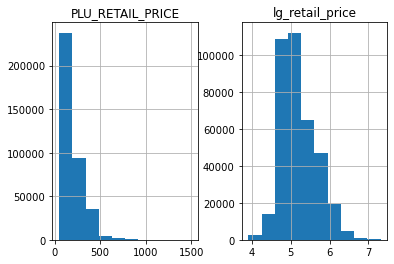

In [44]:
data0["lg_retail_price"] = np.log(data0["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data0[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

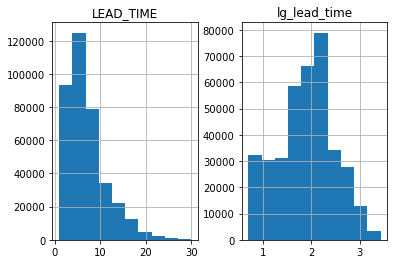

In [89]:
data0["lg_lead_time"] = np.log(data0["LEAD_TIME"]+1) # Transfrom to Log
axes = data0[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [45]:
data0['INTERCEPT']=1

In [46]:
data0["time_weee"] = data0["LEAD_TIME"].mul(data0["WEEE"])
data0["time_installation"] = data0["LEAD_TIME"].mul(data0["Installation"])

In [46]:
independent_variables = ['LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data0[independent_variables]

In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.1        LEAD_TIME
1         1.8  DELIVERY_CHARGE
2         1.7             WEEE
3         1.0     Installation
4         1.0  DIFFERENCE_RATE
5         6.0        INTERCEPT

In [48]:
logit = sm.Logit(data0['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.313926
         Iterations 7


In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               375066
Model:                          Logit   Df Residuals:                   375060
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1591
Time:                        01:28:43   Log-Likelihood:            -1.1774e+05
converged:                       True   LL-Null:                   -1.4003e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LEAD_TIME           0.0206      0.001     16.603      0.000       0.018       0.023
DELIVERY_CHARGE     0.0727      0.000    181.865      0.000       0.072       0.073
WEEE               -1.1703      0.016    -75.332      0.000      -1.201      -1.140
Installation       -0.7545      0.375     -2.010      0.044      -1.490      -0.019
DIFFERENCE_RATE    -0.2842      0.073     -3.918      0.000      -0.426      -0.142
INTERCEPT          -2.8303      0.014   -200.320      0.000      -2.858      -2.803
===================================================================================
"""

In [50]:
print(np.exp(result.params))

LEAD_TIME          1.020804
DELIVERY_CHARGE    1.075410
WEEE               0.310264
Installation       0.470231
DIFFERENCE_RATE    0.752651
INTERCEPT          0.058996
dtype: float64


In [51]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
LEAD_TIME        1.018326  1.023288  1.020804
DELIVERY_CHARGE  1.074567  1.076253  1.075410
WEEE             0.300959  0.319856  0.310264
Installation     0.225298  0.981441  0.470231
DIFFERENCE_RATE  0.652916  0.867621  0.752651
INTERCEPT        0.057385  0.060653  0.058996


### Tumble

In [52]:
data8 = pd.read_csv('tumble_dryer.csv')
data8.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1999.99             20.0     1.0          1     0   GL       0   
1           1190.00             15.0     1.0          7     1   TD       0   
2           1259.99             25.0     1.0          5     1   PE       0   
3            916.00              0.0     1.0         26     0   SG       0   
4            915.00             30.0     1.0          1     0   DY       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2019  ...                      0   
2             1           0        2020  ...                      0   
3             0           0        2019  ...                      0   
4             0           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              1              0   
1                               0              1              0   
2                               0              1              0   
3                               0              1              0   
4                               0              1              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.165066  
1                 0         0.332734  
2                 0         0.143345  
3                 0         0.129459  
4                 0         0.083825  

[5 rows x 34 columns]

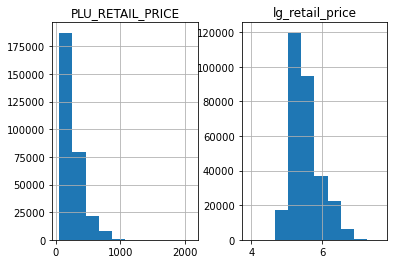

In [53]:
data8["lg_retail_price"] = np.log(data8["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data8[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [54]:
data8['INTERCEPT']=1

In [55]:
data8["time_weee"] = data8["LEAD_TIME"].mul(data8["WEEE"])
data8["time_installation"] = data8["LEAD_TIME"].mul(data8["Installation"])

In [56]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','IF_WEEKEND','INTERCEPT']
X = data8[independent_variables]

In [57]:
logit = sm.Logit(data8['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.326358
         Iterations 7


In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               297570
Model:                          Logit   Df Residuals:                   297562
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1699
Time:                        01:29:22   Log-Likelihood:                -97114.
converged:                       True   LL-Null:                   -1.1698e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.2419      0.015     15.720      0.000       0.212       0.272
LEAD_TIME           0.0517      0.001     38.761      0.000       0.049       0.054
DELIVERY_CHARGE     0.0903      0.001    176.398      0.000       0.089       0.091
WEEE               -1.2421      0.016    -76.979      0.000      -1.274      -1.210
Installation       -0.7300      0.020    -36.541      0.000      -0.769      -0.691
DIFFERENCE_RATE    -0.3081      0.079     -3.912      0.000      -0.462      -0.154
IF_WEEKEND         -0.0310      0.012     -2.586      0.010      -0.054      -0.007
INTERCEPT          -4.3682      0.087    -50.162      0.000      -4.539      -4.198
===================================================================================
"""

In [59]:
print(np.exp(result.params))

lg_retail_price    1.273603
LEAD_TIME          1.053039
DELIVERY_CHARGE    1.094473
WEEE               0.288782
Installation       0.481899
DIFFERENCE_RATE    0.734869
IF_WEEKEND         0.969508
INTERCEPT          0.012674
dtype: float64


In [60]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print(np.exp(conf))

                     2.5%     97.5%        OR
lg_retail_price  1.235773  1.312592  1.273603
LEAD_TIME        1.050290  1.055794  1.053039
DELIVERY_CHARGE  1.093376  1.095572  1.094473
WEEE             0.279792  0.298060  0.288782
Installation     0.463394  0.501143  0.481899
DIFFERENCE_RATE  0.629761  0.857519  0.734869
IF_WEEKEND       0.947015  0.992534  0.969508
INTERCEPT        0.010685  0.015032  0.012674


### High Earners

In [3]:
data5 = pd.read_csv('high_earner.csv')
data5.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0             950.0             60.0     1.0          2     1   WA       0   
1             950.0             45.0     1.0         14     1   WD       0   
2             925.0             30.0     1.0          3     0   CV       0   
3             930.0             45.0     1.0          5     1    E       0   
4             945.0             25.0     1.0          3     1   SM       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             1           1        2019  ...                      0   
2             1           1        2019  ...                      0   
3             1           0        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              1   
2                               0              0              1   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.034738  
1                 0         0.075915  
2                 0         0.165544  
3                 0         0.050592  
4                 0         0.092205  

[5 rows x 34 columns]

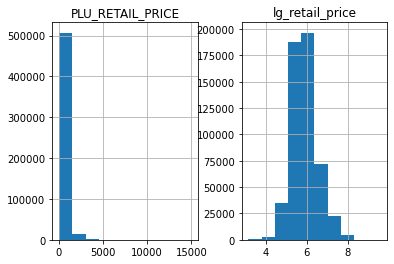

In [4]:
data5["lg_retail_price"] = np.log(data5["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data5[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

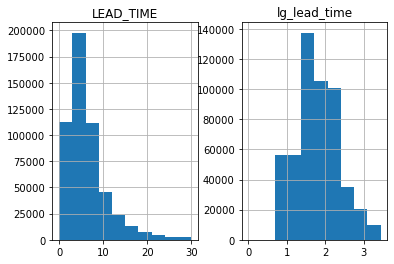

In [193]:
data5["lg_lead_time"] = np.log(data5["LEAD_TIME"]+1) # Transfrom to Log
axes = data5[["LEAD_TIME","lg_lead_time"]].hist() # draw Histogram

In [5]:
data5['INTERCEPT']=1

In [7]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data5[independent_variables]

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.6  DELIVERY_CHARGE
3         1.6             WEEE
4         1.9     Installation
5         1.0  DIFFERENCE_RATE
6        94.9        INTERCEPT

In [9]:
logit = sm.Logit(data5['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.328053
         Iterations 7


In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               521827
Model:                          Logit   Df Residuals:                   521820
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                 0.09312
Time:                        13:49:36   Log-Likelihood:            -1.7119e+05
converged:                       True   LL-Null:                   -1.8876e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1956      0.007     27.634      0.000       0.182       0.209
LEAD_TIME          -0.0096      0.001     -9.573      0.000      -0.012      -0.008
DELIVERY_CHARGE     0.0395      0.000    167.904      0.000       0.039       0.040
WEEE               -0.6604      0.012    -55.674      0.000      -0.684      -0.637
Installation       -1.1626      0.015    -76.561      0.000      -1.192      -1.133
DIFFERENCE_RATE    -0.4330      0.062     -6.958      0.000      -0.555      -0.311
INTERCEPT          -3.5874      0.044    -82.429      0.000      -3.673      -3.502
===================================================================================
"""

In [11]:
print(np.exp(result.params))

lg_retail_price    1.216020
LEAD_TIME          0.990411
DELIVERY_CHARGE    1.040263
WEEE               0.516664
Installation       0.312680
DIFFERENCE_RATE    0.648545
INTERCEPT          0.027670
dtype: float64


### Retired

In [70]:
data6 = pd.read_csv('retired.csv')
data6.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1044.99             55.0     1.0          1     1   GU       0   
1           1099.00             42.5     1.0          3     1   HP       1   
2           1129.00             75.0     1.0          1     1   RG       0   
3           1099.00             45.0     1.0          4     0   YO       1   
4            950.00             65.0     1.0         10     1   IV       1   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             0           0        2020  ...                      0   
2             1           0        2019  ...                      0   
3             1           1        2020  ...                      0   
4             1           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              1   
2                               0              0              1   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.045579  
1                 0         0.071603  
2                 0         0.087209  
3                 0         0.276029  
4                 0         0.209951  

[5 rows x 34 columns]

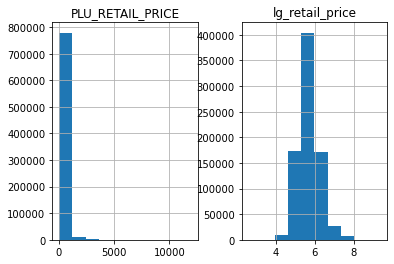

In [71]:
data6["lg_retail_price"] = np.log(data6["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data6[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [72]:
data6['INTERCEPT']=1

In [73]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data6[independent_variables]

In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.6  DELIVERY_CHARGE
3         1.5             WEEE
4         2.0     Installation
5         1.0  DIFFERENCE_RATE
6       126.7        INTERCEPT

In [75]:
logit = sm.Logit(data6['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.323357
         Iterations 7


In [76]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               792130
Model:                          Logit   Df Residuals:                   792123
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.05414
Time:                        07:05:20   Log-Likelihood:            -2.5614e+05
converged:                       True   LL-Null:                   -2.7080e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.0791      0.007     11.088      0.000       0.065       0.093
LEAD_TIME           0.0076      0.001      9.234      0.000       0.006       0.009
DELIVERY_CHARGE     0.0304      0.000    165.632      0.000       0.030       0.031
WEEE               -0.3897      0.009    -43.831      0.000      -0.407      -0.372
Installation       -1.1615      0.012    -96.328      0.000      -1.185      -1.138
DIFFERENCE_RATE    -0.3337      0.048     -6.943      0.000      -0.428      -0.240
INTERCEPT          -2.9304      0.042    -70.312      0.000      -3.012      -2.849
===================================================================================
"""

In [77]:
print(np.exp(result.params))

lg_retail_price    1.082301
LEAD_TIME          1.007656
DELIVERY_CHARGE    1.030850
WEEE               0.677290
Installation       0.313019
DIFFERENCE_RATE    0.716245
INTERCEPT          0.053376
dtype: float64


### millennials

In [9]:
data7 = pd.read_csv('millennials.csv')
data7.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0         923.00000             45.0     1.0          6     0   EN       1   
1         919.98999             45.0     1.0          5     1   OX       0   
2         928.00000             85.0     1.0          1     1   CV       1   
3         919.99000             65.0     1.0          7     1   CR       1   
4         923.00000              0.0     1.0          5     0   KA       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2019  ...                      0   
1             1           1        2020  ...                      0   
2             1           1        2019  ...                      0   
3             1           1        2020  ...                      0   
4             0           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            0                0               0                        0   
1            0                0               0                        0   
2            1                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              1   
1                               0              0              1   
2                               0              0              0   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.096660  
1                 0         0.128419  
2                 0         0.165544  
3                 0         0.091067  
4                 0         0.245510  

[5 rows x 34 columns]

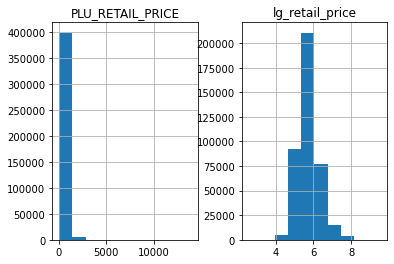

In [10]:
data7["lg_retail_price"] = np.log(data7["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data7[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [11]:
data7['INTERCEPT']=1

In [12]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data7[independent_variables]

In [13]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.4  DELIVERY_CHARGE
3         1.5             WEEE
4         1.8     Installation
5         1.0  DIFFERENCE_RATE
6       111.8        INTERCEPT

In [14]:
logit = sm.Logit(data7['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.304976
         Iterations 7


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               405433
Model:                          Logit   Df Residuals:                   405426
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 Aug 2020   Pseudo R-squ.:                 0.08728
Time:                        01:55:09   Log-Likelihood:            -1.2365e+05
converged:                       True   LL-Null:                   -1.3547e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1644      0.009     17.541      0.000       0.146       0.183
LEAD_TIME           0.0053      0.001      4.530      0.000       0.003       0.008
DELIVERY_CHARGE     0.0416      0.000    144.711      0.000       0.041       0.042
WEEE               -0.7710      0.015    -51.995      0.000      -0.800      -0.742
Installation       -1.3659      0.019    -71.217      0.000      -1.403      -1.328
DIFFERENCE_RATE     0.1046      0.073      1.428      0.153      -0.039       0.248
INTERCEPT          -3.5948      0.056    -64.267      0.000      -3.704      -3.485
===================================================================================
"""

In [17]:
print(np.exp(result.params))

lg_retail_price    1.178635
LEAD_TIME          1.005342
DELIVERY_CHARGE    1.042440
WEEE               0.462567
Installation       0.255150
DIFFERENCE_RATE    1.110255
INTERCEPT          0.027467
dtype: float64


### Lower income family

In [15]:
data8 = pd.read_csv('lower_income_family.csv')
data8.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0       1044.990000        45.000000     1.0          5     1   WV       0   
1        928.000000        16.666667     1.0          3     0   HR       0   
2        199.990005         0.000000     1.0          8     0   LE       0   
3        199.990000        20.000000     1.0          5     1   PE       0   
4        189.000000         0.000000     1.0         13     0   HP       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             1           0        2020  ...                      0   
1             1           0        2019  ...                      0   
2             0           0        2020  ...                      0   
3             0           0        2020  ...                      0   
4             0           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            1                0               0                        0   
2            1                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              0   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.048007  
1                 0         0.265443  
2                 0         0.096267  
3                 0         0.143345  
4                 0         0.071603  

[5 rows x 34 columns]

In [16]:
data8["lg_retail_price"] = np.log(data8["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data8[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [17]:
data8['INTERCEPT']=1

In [19]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data8[independent_variables]

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.4  DELIVERY_CHARGE
3         1.5             WEEE
4         1.9     Installation
5         1.0  DIFFERENCE_RATE
6       124.0        INTERCEPT

In [21]:
logit = sm.Logit(data8['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.286447
         Iterations 7


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               351789
Model:                          Logit   Df Residuals:                   351782
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                 0.06693
Time:                        03:05:41   Log-Likelihood:            -1.0077e+05
converged:                       True   LL-Null:                   -1.0800e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1942      0.011     17.431      0.000       0.172       0.216
LEAD_TIME           0.0276      0.001     21.182      0.000       0.025       0.030
DELIVERY_CHARGE     0.0370      0.000    112.919      0.000       0.036       0.038
WEEE               -0.5346      0.016    -33.177      0.000      -0.566      -0.503
Installation       -1.4239      0.023    -61.499      0.000      -1.469      -1.379
DIFFERENCE_RATE    -0.1183      0.084     -1.402      0.161      -0.284       0.047
INTERCEPT          -3.9271      0.066    -59.506      0.000      -4.056      -3.798
===================================================================================
"""

In [23]:
print(np.exp(result.params))

lg_retail_price    1.214360
LEAD_TIME          1.027985
DELIVERY_CHARGE    1.037690
WEEE               0.585888
Installation       0.240770
DIFFERENCE_RATE    0.888470
INTERCEPT          0.019701
dtype: float64


### Middle income family

In [25]:
data9 = pd.read_csv('middle_income_family.csv')
data9.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0         949.00000             0.01     1.0          1     0   RM       0   
1         919.98999            40.00     1.0          6     1   YO       0   
2         919.98999            10.00     1.0          8     1   TA       0   
3         199.99000             0.00     1.0         26     0   KA       0   
4         199.00000            20.00     1.0          5     0   LU       1   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           1        2019  ...                      0   
1             0           1        2020  ...                      0   
2             0           0        2020  ...                      0   
3             0           1        2019  ...                      0   
4             0           1        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              1   
2                               0              0              1   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.023819  
1                 0         0.276029  
2                 0         0.181929  
3                 0         0.245510  
4                 0         0.073235  

[5 rows x 34 columns]

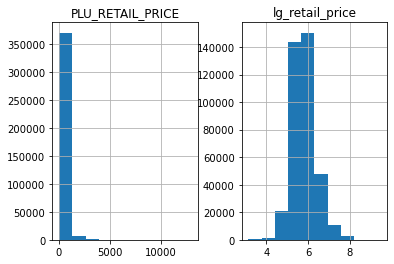

In [26]:
data9["lg_retail_price"] = np.log(data9["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data9[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [27]:
data9['INTERCEPT']=1

In [28]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data9[independent_variables]

In [29]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.5  DELIVERY_CHARGE
3         1.6             WEEE
4         1.8     Installation
5         1.0  DIFFERENCE_RATE
6       112.6        INTERCEPT

In [30]:
logit = sm.Logit(data9['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.293389
         Iterations 7


In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               378322
Model:                          Logit   Df Residuals:                   378315
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                 0.07868
Time:                        03:09:24   Log-Likelihood:            -1.1100e+05
converged:                       True   LL-Null:                   -1.2047e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.2183      0.010     22.116      0.000       0.199       0.238
LEAD_TIME           0.0208      0.001     17.342      0.000       0.018       0.023
DELIVERY_CHARGE     0.0404      0.000    128.473      0.000       0.040       0.041
WEEE               -0.6976      0.015    -45.073      0.000      -0.728      -0.667
Installation       -1.3361      0.021    -63.053      0.000      -1.378      -1.295
DIFFERENCE_RATE     0.1999      0.077      2.581      0.010       0.048       0.352
INTERCEPT          -4.0720      0.060    -68.431      0.000      -4.189      -3.955
===================================================================================
"""

In [32]:
print(np.exp(result.params))

lg_retail_price    1.243913
LEAD_TIME          1.020987
DELIVERY_CHARGE    1.041198
WEEE               0.497789
Installation       0.262869
DIFFERENCE_RATE    1.221308
INTERCEPT          0.017043
dtype: float64


### Older middle income

In [61]:
data10 = pd.read_csv('older_middle_income.csv')
data10.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0            929.00              0.0     1.0          1     0   SK       0   
1           1044.99             50.0     1.0          1     1   CF       0   
2            919.00             15.0     1.0         13     1   NW       0   
3            919.99             65.0     1.0          7     1   CR       1   
4           1129.00             85.0     1.0          1     1    E       1   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2019  ...                      0   
1             0           1        2020  ...                      0   
2             0           1        2020  ...                      0   
3             1           1        2020  ...                      0   
4             1           0        2019  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            1                0               0                        0   
2            0                0               0                        0   
3            0                0               0                        0   
4            0                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              0   
2                               0              0              1   
3                               0              0              1   
4                               0              0              1   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.074269  
1                 0         0.051971  
2                 0         0.088805  
3                 0         0.091067  
4                 0         0.050592  

[5 rows x 34 columns]

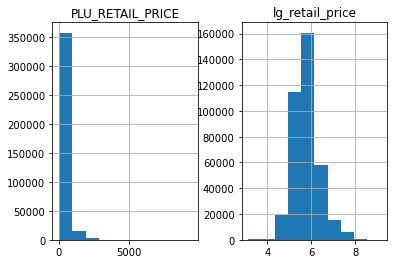

In [62]:
data10["lg_retail_price"] = np.log(data10["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data10[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [63]:
data10['INTERCEPT']=1

In [64]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data10[independent_variables]

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.6  DELIVERY_CHARGE
3         1.6             WEEE
4         1.9     Installation
5         1.0  DIFFERENCE_RATE
6       106.1        INTERCEPT

In [66]:
logit = sm.Logit(data10['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.317039
         Iterations 7


In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               375851
Model:                          Logit   Df Residuals:                   375844
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                 0.07973
Time:                        03:15:09   Log-Likelihood:            -1.1916e+05
converged:                       True   LL-Null:                   -1.2948e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1787      0.009     19.368      0.000       0.161       0.197
LEAD_TIME           0.0137      0.001     11.945      0.000       0.011       0.016
DELIVERY_CHARGE     0.0390      0.000    133.109      0.000       0.038       0.040
WEEE               -0.6112      0.014    -42.970      0.000      -0.639      -0.583
Installation       -1.3116      0.019    -67.717      0.000      -1.350      -1.274
DIFFERENCE_RATE    -0.2201      0.072     -3.060      0.002      -0.361      -0.079
INTERCEPT          -3.6410      0.055    -65.713      0.000      -3.750      -3.532
===================================================================================
"""

In [68]:
print(np.exp(result.params))

lg_retail_price    1.195629
LEAD_TIME          1.013830
DELIVERY_CHARGE    1.039750
WEEE               0.542713
Installation       0.269395
DIFFERENCE_RATE    0.802399
INTERCEPT          0.026225
dtype: float64


### Older lower income

In [59]:
data11 = pd.read_csv('older_lower_income.csv')
data11.head()

PLU_RETAIL_PRICE  DELIVERY_CHARGE  VOLUME  LEAD_TIME  WEEE AREA  D_OR_Q  \
0           1174.99              0.0     1.0          4     0   BN       0   
1            950.00             95.0     1.0          1     0   KA       1   
2            930.00             55.0     1.0          5     1   SW       1   
3           1174.00             75.0     1.0          6     1   PE       1   
4           1174.99              0.0     1.0          1     0   BN       0   

   Installation  IF_WEEKEND  ORDER_YEAR  ...  COOKING FREE STANDING  \
0             0           0        2020  ...                      0   
1             1           1        2019  ...                      0   
2             1           0        2019  ...                      0   
3             1           1        2020  ...                      0   
4             0           0        2020  ...                      0   

   DISHWASHERS  FRIDGE FREEZERS  INTEGRATED MDA  LARGE SCREEN TELEVISION  \
0            1                0               0                        0   
1            0                0               0                        0   
2            0                0               0                        0   
3            1                0               0                        0   
4            1                0               0                        0   

   SLIM AMERICAN STYLE FRIDGE FRZ  TUMBLE DRYERS  WASHER DRYERS  \
0                               0              0              0   
1                               0              0              1   
2                               0              0              1   
3                               0              0              0   
4                               0              0              0   

   WASHING MACHINES  DIFFERENCE_RATE  
0                 0         0.061808  
1                 0         0.245510  
2                 0         0.077033  
3                 0         0.143345  
4                 0         0.061808  

[5 rows x 34 columns]

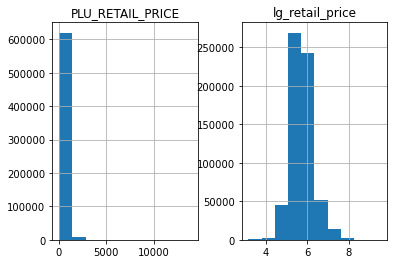

In [69]:
data11["lg_retail_price"] = np.log(data11["PLU_RETAIL_PRICE"]) # Transfrom to Log
axes = data11[["PLU_RETAIL_PRICE","lg_retail_price"]].hist() # draw Histogram

In [70]:
data11['INTERCEPT']=1

In [71]:
independent_variables = ['lg_retail_price', 'LEAD_TIME','DELIVERY_CHARGE','WEEE','Installation','DIFFERENCE_RATE','INTERCEPT']
X = data11[independent_variables]

In [72]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor         features
0         1.0  lg_retail_price
1         1.0        LEAD_TIME
2         2.5  DELIVERY_CHARGE
3         1.5             WEEE
4         1.9     Installation
5         1.0  DIFFERENCE_RATE
6       119.8        INTERCEPT

In [74]:
logit = sm.Logit(data11['D_OR_Q'],X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.317095
         Iterations 7


In [75]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 D_OR_Q   No. Observations:               627733
Model:                          Logit   Df Residuals:                   627726
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                 0.07001
Time:                        03:16:25   Log-Likelihood:            -1.9905e+05
converged:                       True   LL-Null:                   -2.1404e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
lg_retail_price     0.1718      0.008     22.179      0.000       0.157       0.187
LEAD_TIME           0.0143      0.001     15.657      0.000       0.012       0.016
DELIVERY_CHARGE     0.0359      0.000    162.169      0.000       0.035       0.036
WEEE               -0.4798      0.011    -45.285      0.000      -0.501      -0.459
Installation       -1.3148      0.015    -88.293      0.000      -1.344      -1.286
DIFFERENCE_RATE    -0.0383      0.057     -0.669      0.503      -0.151       0.074
INTERCEPT          -3.5931      0.046    -78.519      0.000      -3.683      -3.503
===================================================================================
"""

In [76]:
print(np.exp(result.params))

lg_retail_price    1.187487
LEAD_TIME          1.014354
DELIVERY_CHARGE    1.036513
WEEE               0.618883
Installation       0.268523
DIFFERENCE_RATE    0.962393
INTERCEPT          0.027512
dtype: float64
